<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/processing_Harvard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Harvard data pre-processing for graph learning </center></h1>

<center> Kévin CORTIAL et Taoufik JARMOUNI &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; Open Studio UCA IP / Atlas des Synergies Productives &nbsp;&nbsp;&nbsp; </center>

---

Needed packages installation : 

In [7]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

CSV file importation (Github):

In [38]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/data/Harvard/hs92_proximities.csv'

original_df = pd.read_csv(url)

#print(original_df)

         commoditycode_1  commoditycode_2  proximity
0                    101              101   0.000000
1                    101              102   0.277778
2                    101              103   0.352941
3                    101              104   0.260870
4                    101              105   0.296296
...                  ...              ...        ...
1537595             9706             9702   0.227273
1537596             9706             9703   0.181818
1537597             9706             9704   0.318182
1537598             9706             9705   0.363636
1537599             9706             9706   0.000000

[1537600 rows x 3 columns]


Graph generation using the Harvard data plus the networkx package:

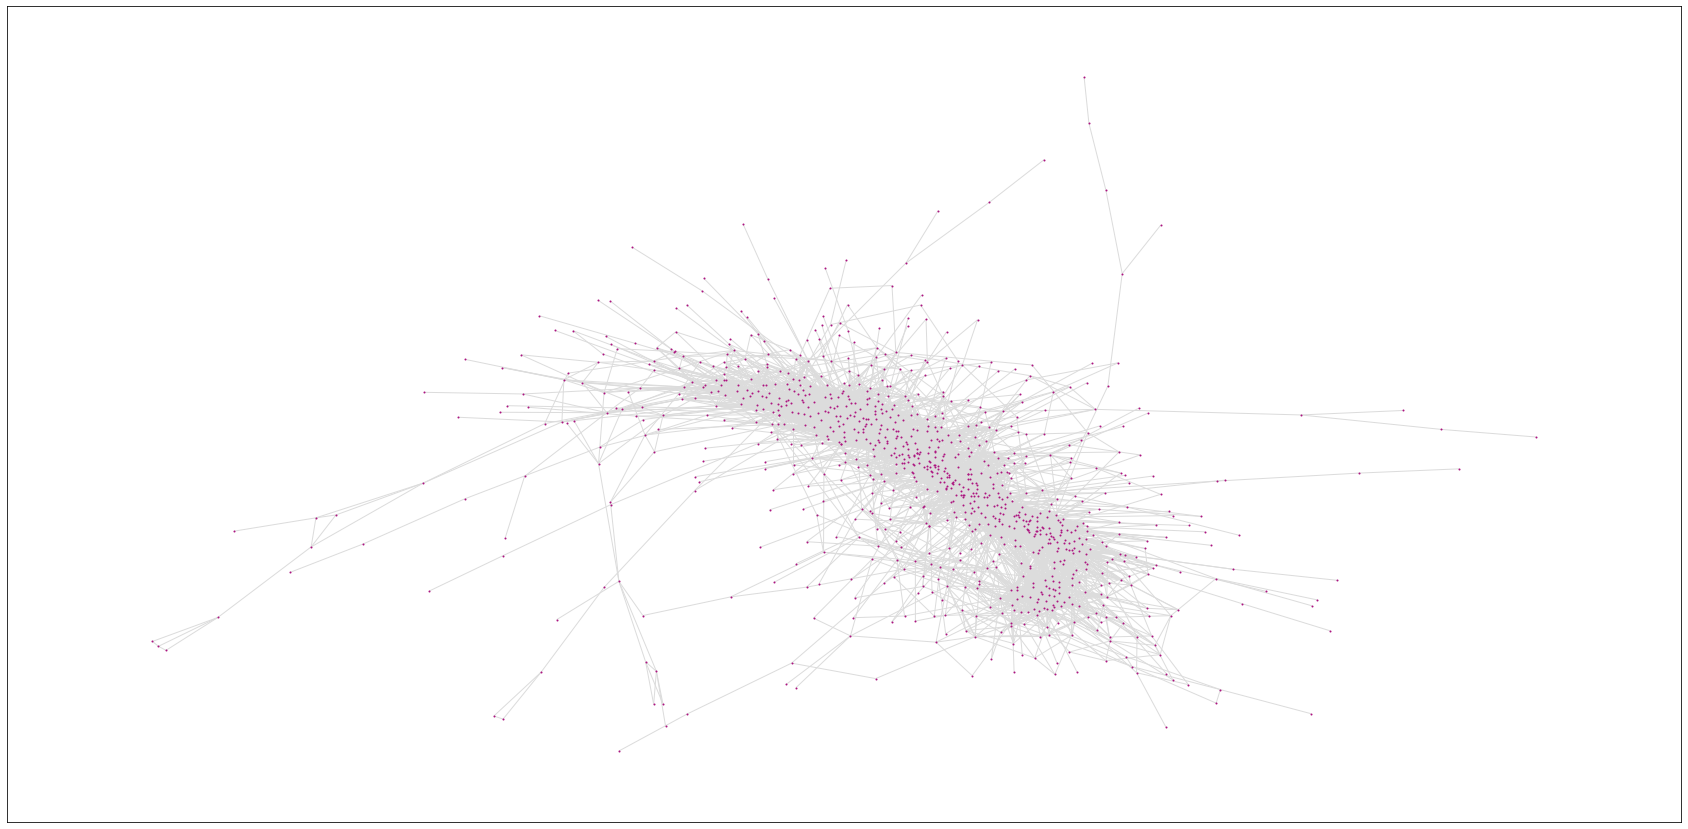

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def get_graph_from_dataframe(dataframe):
  # We only need the three needed columns
  dataframe = dataframe[["commoditycode_1", "commoditycode_2", "proximity"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe into an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  #nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  return dataframe


def get_clean_graph_from_dataframe(dataframe):
  G = nx.from_pandas_adjacency(dataframe)
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.1]
  G.remove_nodes_from(list_attached_nodes)
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='gainsboro')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G


final_df = get_graph_from_dataframe(original_df)
G = get_clean_graph_from_dataframe(final_df)

---

JSON file importation (Github):

In [14]:
import json
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/data/Harvard/network_hs92_4digit.json'

response = urlopen(url)
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())
# print the json response
#print(data_json)

{'nodes': [{'id': '0910', 'x': 2713.3887939453, 'y': 2416.4245605469}, {'id': '6103', 'x': 2614.3696289062, 'y': 2386.6313476562}, {'id': '6106', 'x': 2583.1158447266, 'y': 2490.0737304688}, {'id': '6108', 'x': 2595.2375488281, 'y': 2421.6455078125}, {'id': '0806', 'x': 2496.6026611328, 'y': 2819.34765625}, {'id': '0813', 'x': 2524.9600830078, 'y': 2827.0993652344}, {'id': '0811', 'x': 2427.9798583984, 'y': 2395.0383300781}, {'id': '6910', 'x': 2479.1219482422, 'y': 2413.466796875}, {'id': '2523', 'x': 2482.0083007812, 'y': 2374.62890625}, {'id': '1205', 'x': 1983.8887939453, 'y': 2673.7119140625}, {'id': '8403', 'x': 1824.0993041992, 'y': 2474.6901855469}, {'id': '1211', 'x': 2613.9614257812, 'y': 2364.1867675781}, {'id': '6109', 'x': 2638.4412841797, 'y': 2405.4008789062}, {'id': '6204', 'x': 2679.7360839844, 'y': 2384.4221191406}, {'id': '6209', 'x': 2727.5308837891, 'y': 2441.7993164062}, {'id': '1101', 'x': 2475.8879394531, 'y': 2259.4719238281}, {'id': '0703', 'x': 2519.166992187

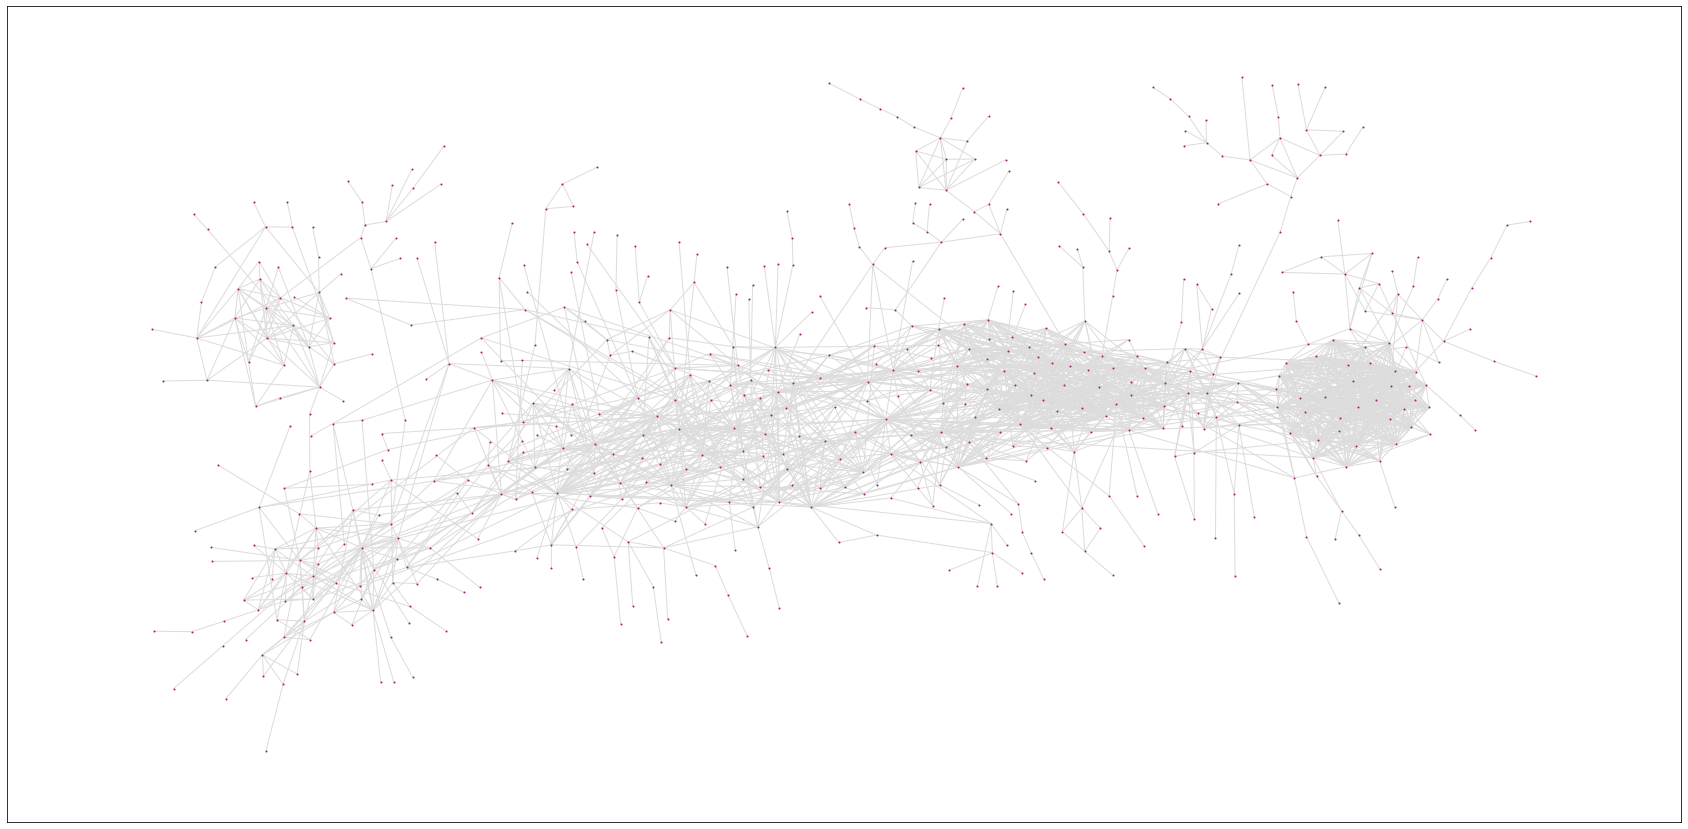

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# PART TWO, other dataframe (positions):
def get_graph_from_dataframe_hs(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  nx.set_node_attributes(G, pos, 'coord')
  #nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro', pos = pos)
  return dataframe

def get_graph_from_dataframe_hs_no_pos(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  nx.set_node_attributes(G, pos, 'coord')
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  plt.show()
  return dataframe

def get_clean_graph_from_dataframe_hs(dataframe, pos):
  G = nx.from_pandas_adjacency(dataframe)
  
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.06]

  
  G.remove_nodes_from(list_attached_nodes)

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='gainsboro', pos = pos)
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G

# First file.json that contains two dataframes, one with nodes infos and the other with the edges
df_nodes = pd.DataFrame(data_json['nodes'])
df_edges = pd.DataFrame(data_json['edges'])

# Dictionary of tuples that contains the positions (x, y) of every node
pos = df_nodes.set_index('id').apply(tuple, 1).groupby(level=0).agg(lambda x: x.values).to_dict()

original_df_positions = df_edges

df_positions = get_graph_from_dataframe_hs(original_df_positions, pos)
#df_no_positions = get_graph_from_dataframe_hs_no_pos(original_df_positions, pos)

G_positions = get_clean_graph_from_dataframe_hs(df_positions, pos)
#G_no_positions = get_clean_graph_from_dataframe_hs_no_pos(df_no_positions)

---

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'graph_tool', 'wurlitzer', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}
{'0101': 2, '0102': 1, '0105': 1, '0201': 2, '0202': 2, '0203': 2, '0204': 7, '0206': 2, '0207': 2, '0210': 2, '0301': 6, '0302': 6, '0303': 6, '0304': 6, '0305': 6, '0306': 6, '0307': 6, '0401': 1, '0403': 1, '0404': 2, '0405': 2, '0406': 1, '0407': 1, '0504': 2, '0511': 2, '0602': 7, '0701': 7, '0702': 7, '0703': 7, '0704': 7, '0705': 7, '0706': 7, '0707': 7, '0708': 1, '0709': 1, '0710': 7, '0712': 7, '0713': 7, '0714': 6, '0802': 8, '0803': 6, '0804': 1, '0805': 7, '0806': 7, '0807': 1, '0808': 7, '0809': 7, '0810': 1, '0811': 1, '0813': 7, '0901': 6, '0904': 6, '0910': 13, '1001': 2, '1003': 2, '1005': 10

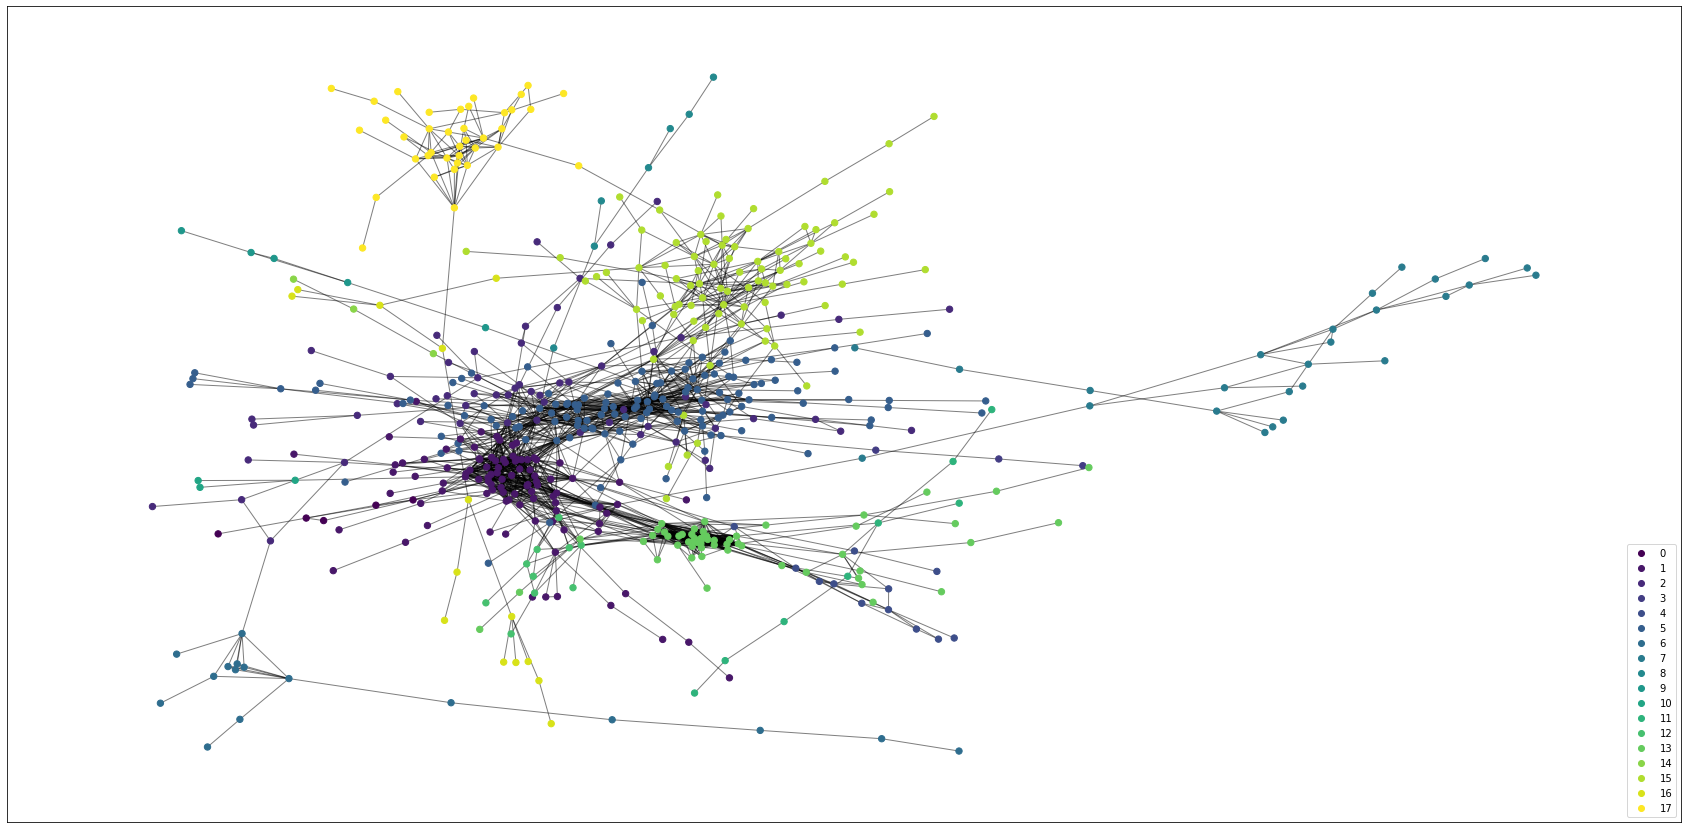

Graph with 586 nodes and 2103 edges
[17, 7, 7, 7, 5, 24, 15, 26, 22, 14, 30, 22, 1, 29, 28, 26, 3, 9, 2, 2, 4, 4, 8, 11, 12, 21, 9, 11, 3, 1, 28, 20, 22, 20, 6, 16, 4, 28, 20, 11, 27, 24, 29, 22, 16, 18, 16, 26, 7, 1, 1, 1, 24, 9, 12, 14, 9, 28, 15, 20, 13, 23, 2, 4, 20, 30, 3, 9, 15, 5, 18, 18, 23, 2, 8, 28, 22, 17, 27, 5, 12, 8, 22, 11, 5, 13, 25, 8, 20, 10, 2, 1, 6, 19, 12, 8, 17, 12, 1, 23, 15, 15, 13, 24, 14, 24, 20, 12, 26, 23, 26, 6, 9, 7, 8, 5, 14, 17, 27, 21, 23, 25, 17, 9, 15, 15, 7, 24, 7, 21, 3, 12, 6, 7, 21, 14, 13, 29, 17, 5, 7, 18, 4, 16, 25, 9, 27, 27, 26, 21, 16, 21, 2, 11, 11, 14, 7, 24, 11, 20, 24, 14, 14, 11, 20, 3, 28, 4, 13, 26, 27, 3, 26, 22, 7, 21, 16, 26, 23, 19, 12, 23, 10, 7, 4, 15, 8, 30, 3, 18, 30, 7, 3, 9, 24, 24, 11, 30, 2, 30, 27, 12, 17, 20, 22, 22, 23, 5, 13, 4, 16, 23, 17, 22, 5, 12, 8, 2, 25, 14, 8, 10, 17, 25, 11, 5, 18, 9, 12, 16, 4, 21, 3, 25, 15, 28, 1, 21, 19, 26, 9, 3, 19, 30, 25, 3, 28, 15, 8, 16, 1, 6, 14, 27, 13, 22, 5, 19, 9, 11, 20, 3, 17,

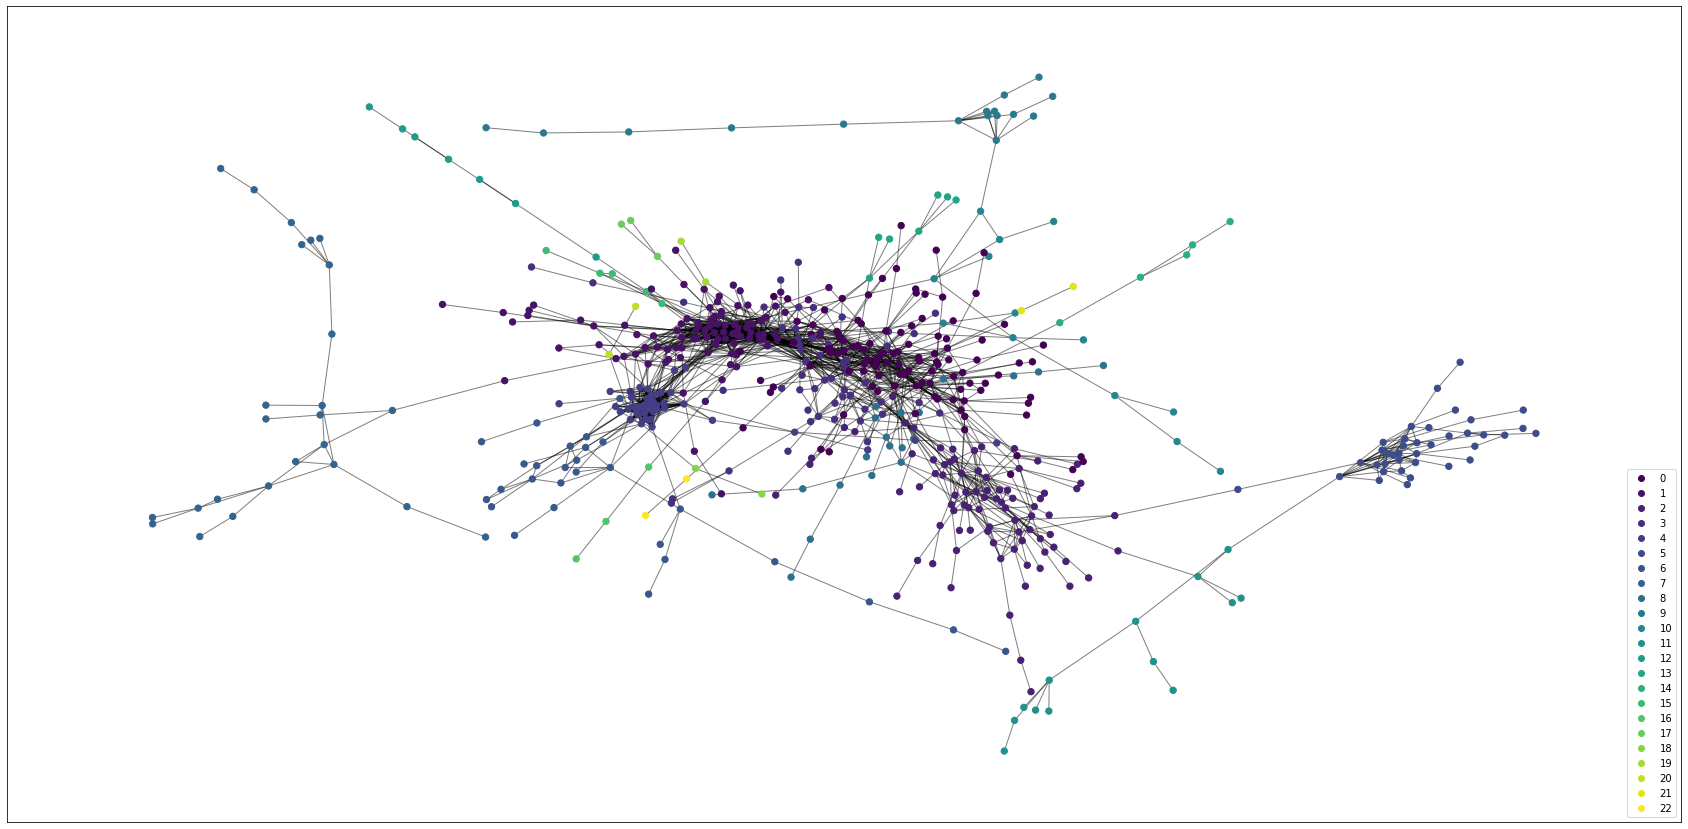

In [ ]:
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from cdlib import algorithms
import leidenalg
import igraph as ig

def get_louvain_graph_from_G(G):
  # Louvain partition
  partition = community_louvain.best_partition(G)
  print(partition)
  pos = nx.spring_layout(G)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
  nodes = nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)

  # Legend creation
  values = sorted(list(set(partition.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')
  
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return partition

partition = get_louvain_graph_from_G(G_positions)


def get_leiden_graph_from_G(G):
  # Leiden partition
  coms = algorithms.leiden(G)
  G2 = ig.Graph.from_networkx(G)
  print(G)
  import random
  randomlist = []
  for i in range(0,2103):
    n = random.randint(1,30)
    randomlist.append(n)
  print(randomlist)
  partition = leidenalg.find_partition(G2, leidenalg.ModularityVertexPartition, weights = randomlist);

  dict_part = dict()
  idx= 0
  for i in partition.membership:
    dict_part[idx] = i
    idx += 1

  print(dict_part)

  A = G2.get_edgelist()
  #G3 = nx.DiGraph(A) # In case your graph is directed
  G3 = nx.Graph(A) # In case you graph is undirected
  pos = nx.spring_layout(G3)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(dict_part.values()) + 1)
  nodes = nx.draw_networkx_nodes(G2, pos, dict_part.keys(), node_size=40,
                        cmap=cmap, node_color=list(dict_part.values()))
  nx.draw_networkx_edges(G3, pos, alpha=0.5)
  
    # Legend creation
  values = sorted(list(set(dict_part.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')

  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return dict_part, partition

dict_leiden, partition_leiden = get_leiden_graph_from_G(G_positions)

In [ ]:
from sklearn import metrics

# comparer metriques activity_sector, leiden ET activity_sector, louvain
label_louvain = list(partition.values())
label_leiden = partition_leiden.membership
activity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
activity = activity[:586]
print(metrics.adjusted_rand_score(label_leiden, activity))
print(metrics.rand_score(label_leiden, activity))

print(metrics.adjusted_mutual_info_score(label_leiden, activity))
print(metrics.homogeneity_score(label_leiden, activity))
print(metrics.completeness_score(label_leiden, activity))
print(metrics.v_measure_score(label_leiden, activity))
print(metrics.fowlkes_mallows_score(label_leiden, activity))

0.130760001441119
0.850593623289869
0.26964677124568365
0.3461205694184839
0.3328586716964236
0.3393601041300431
0.2137121524429814


In [ ]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# First file.json that contains two dataframes, one with nodes infos and the other with the edges
with open('/content/drive/MyDrive/ColabNotebooks/dynamic_productspace_FRA.json') as json_data:
    data = json.load(json_data)
df = pd.DataFrame(data)
#df = pd.DataFrame(data['edges'])
print(df)

                                                             0  \
index                                                        0   
edges        [[0, 0], [1, 1], [2, 2], [3, 3], [3, 4], [4, 4...   
weights      [1.0, 1.0, 1.0, 1.0, 0.5769230769230769, 1.0, ...   
y            [0.913859102640138, 0.6152713187616885, 0.6273...   
X            [[0.913859102640138], [0.6152713187616885], [0...   
...                                                        ...   
ict                                                        NaN   
financial                                                  NaN   
transport                                                  NaN   
travel                                                     NaN   
unspecified                                                NaN   

                                                             1  \
index                                                        1   
edges        [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5...   
weights  